In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
# Function for insighting summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [3]:
df = pd.read_csv("../data/heart.csv")

In [4]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [5]:
df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

In [6]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 1000 observation and 14 columns in the dataset


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,5.048704e+06,2.895905e+06,103368.0,2536439.50,4952508.5,7681877.00,9990855.0
age,1000.0,4.924200e+01,1.786473e+01,20.0,34.00,49.0,64.25,80.0
gender,1000.0,7.650000e-01,4.242110e-01,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,9.800000e-01,9.531571e-01,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,1.517470e+02,2.996523e+01,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,3.114470e+02,1.324438e+02,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,2.960000e-01,4.567194e-01,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,7.480000e-01,7.701228e-01,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,1.454770e+02,3.419027e+01,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,4.980000e-01,5.002462e-01,0.0,0.00,0.0,1.00,1.0


In [9]:
df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [10]:
df.nunique()

patientid            1000
age                    61
gender                  2
chestpain               4
restingBP              95
serumcholestrol       344
fastingbloodsugar       2
restingrelectro         3
maxheartrate          129
exerciseangia           2
oldpeak                63
slope                   4
noofmajorvessels        4
target                  2
dtype: int64

In [11]:
# to find how many unique values object features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

patientid has 1000 unique value
age has 61 unique value
gender has 2 unique value
chestpain has 4 unique value
restingBP has 95 unique value
serumcholestrol has 344 unique value
fastingbloodsugar has 2 unique value
restingrelectro has 3 unique value
maxheartrate has 129 unique value
exerciseangia has 2 unique value
oldpeak has 63 unique value
slope has 4 unique value
noofmajorvessels has 4 unique value
target has 2 unique value


In [12]:
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

<Axes: >

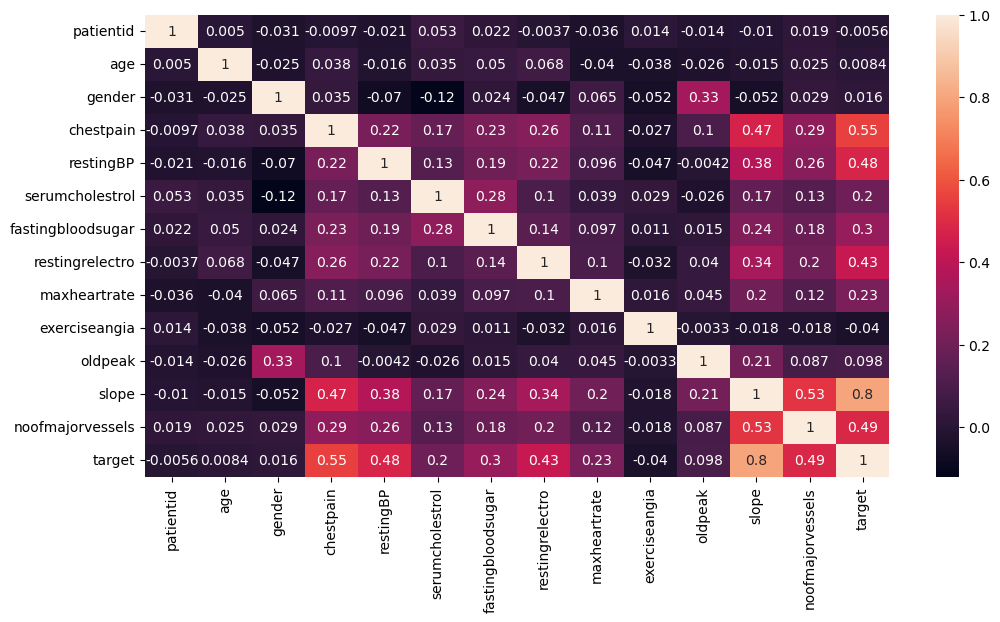

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

#The Examination of Target Variables

In [14]:
first_looking("target")

column name    :  target
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
target
1    580
0    420
Name: count, dtype: int64


target
1    580
0    420
Name: count, dtype: int64


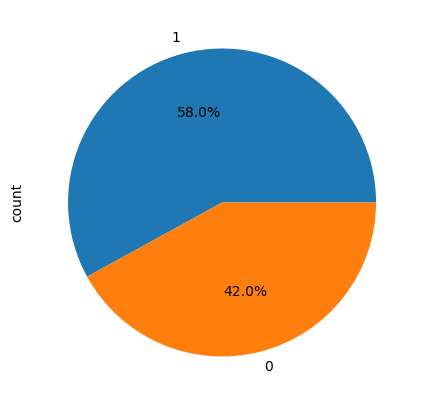

In [15]:
print(df["target"].value_counts())
df["target"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(5,5));

In [16]:
y = df['target']
print(f'Percentage of Heart Disease: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} cases for Heart Disease)\nPercentage of NOT Heart Disease: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} cases for NOT Heart Disease)')

Percentage of Heart Disease: % 58.0 --> (580 cases for Heart Disease)
Percentage of NOT Heart Disease: % 42.0 --> (420 cases for NOT Heart Disease)


In [17]:
df['target'].describe()

count    1000.000000
mean        0.580000
std         0.493805
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [18]:
numerical= df.drop(['target'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope',
       'noofmajorvessels'],
      dtype='object')


Categorical Columns: Index([], dtype='object')


In [19]:
numerical = df.drop(['target'], axis=1).select_dtypes('number').columns

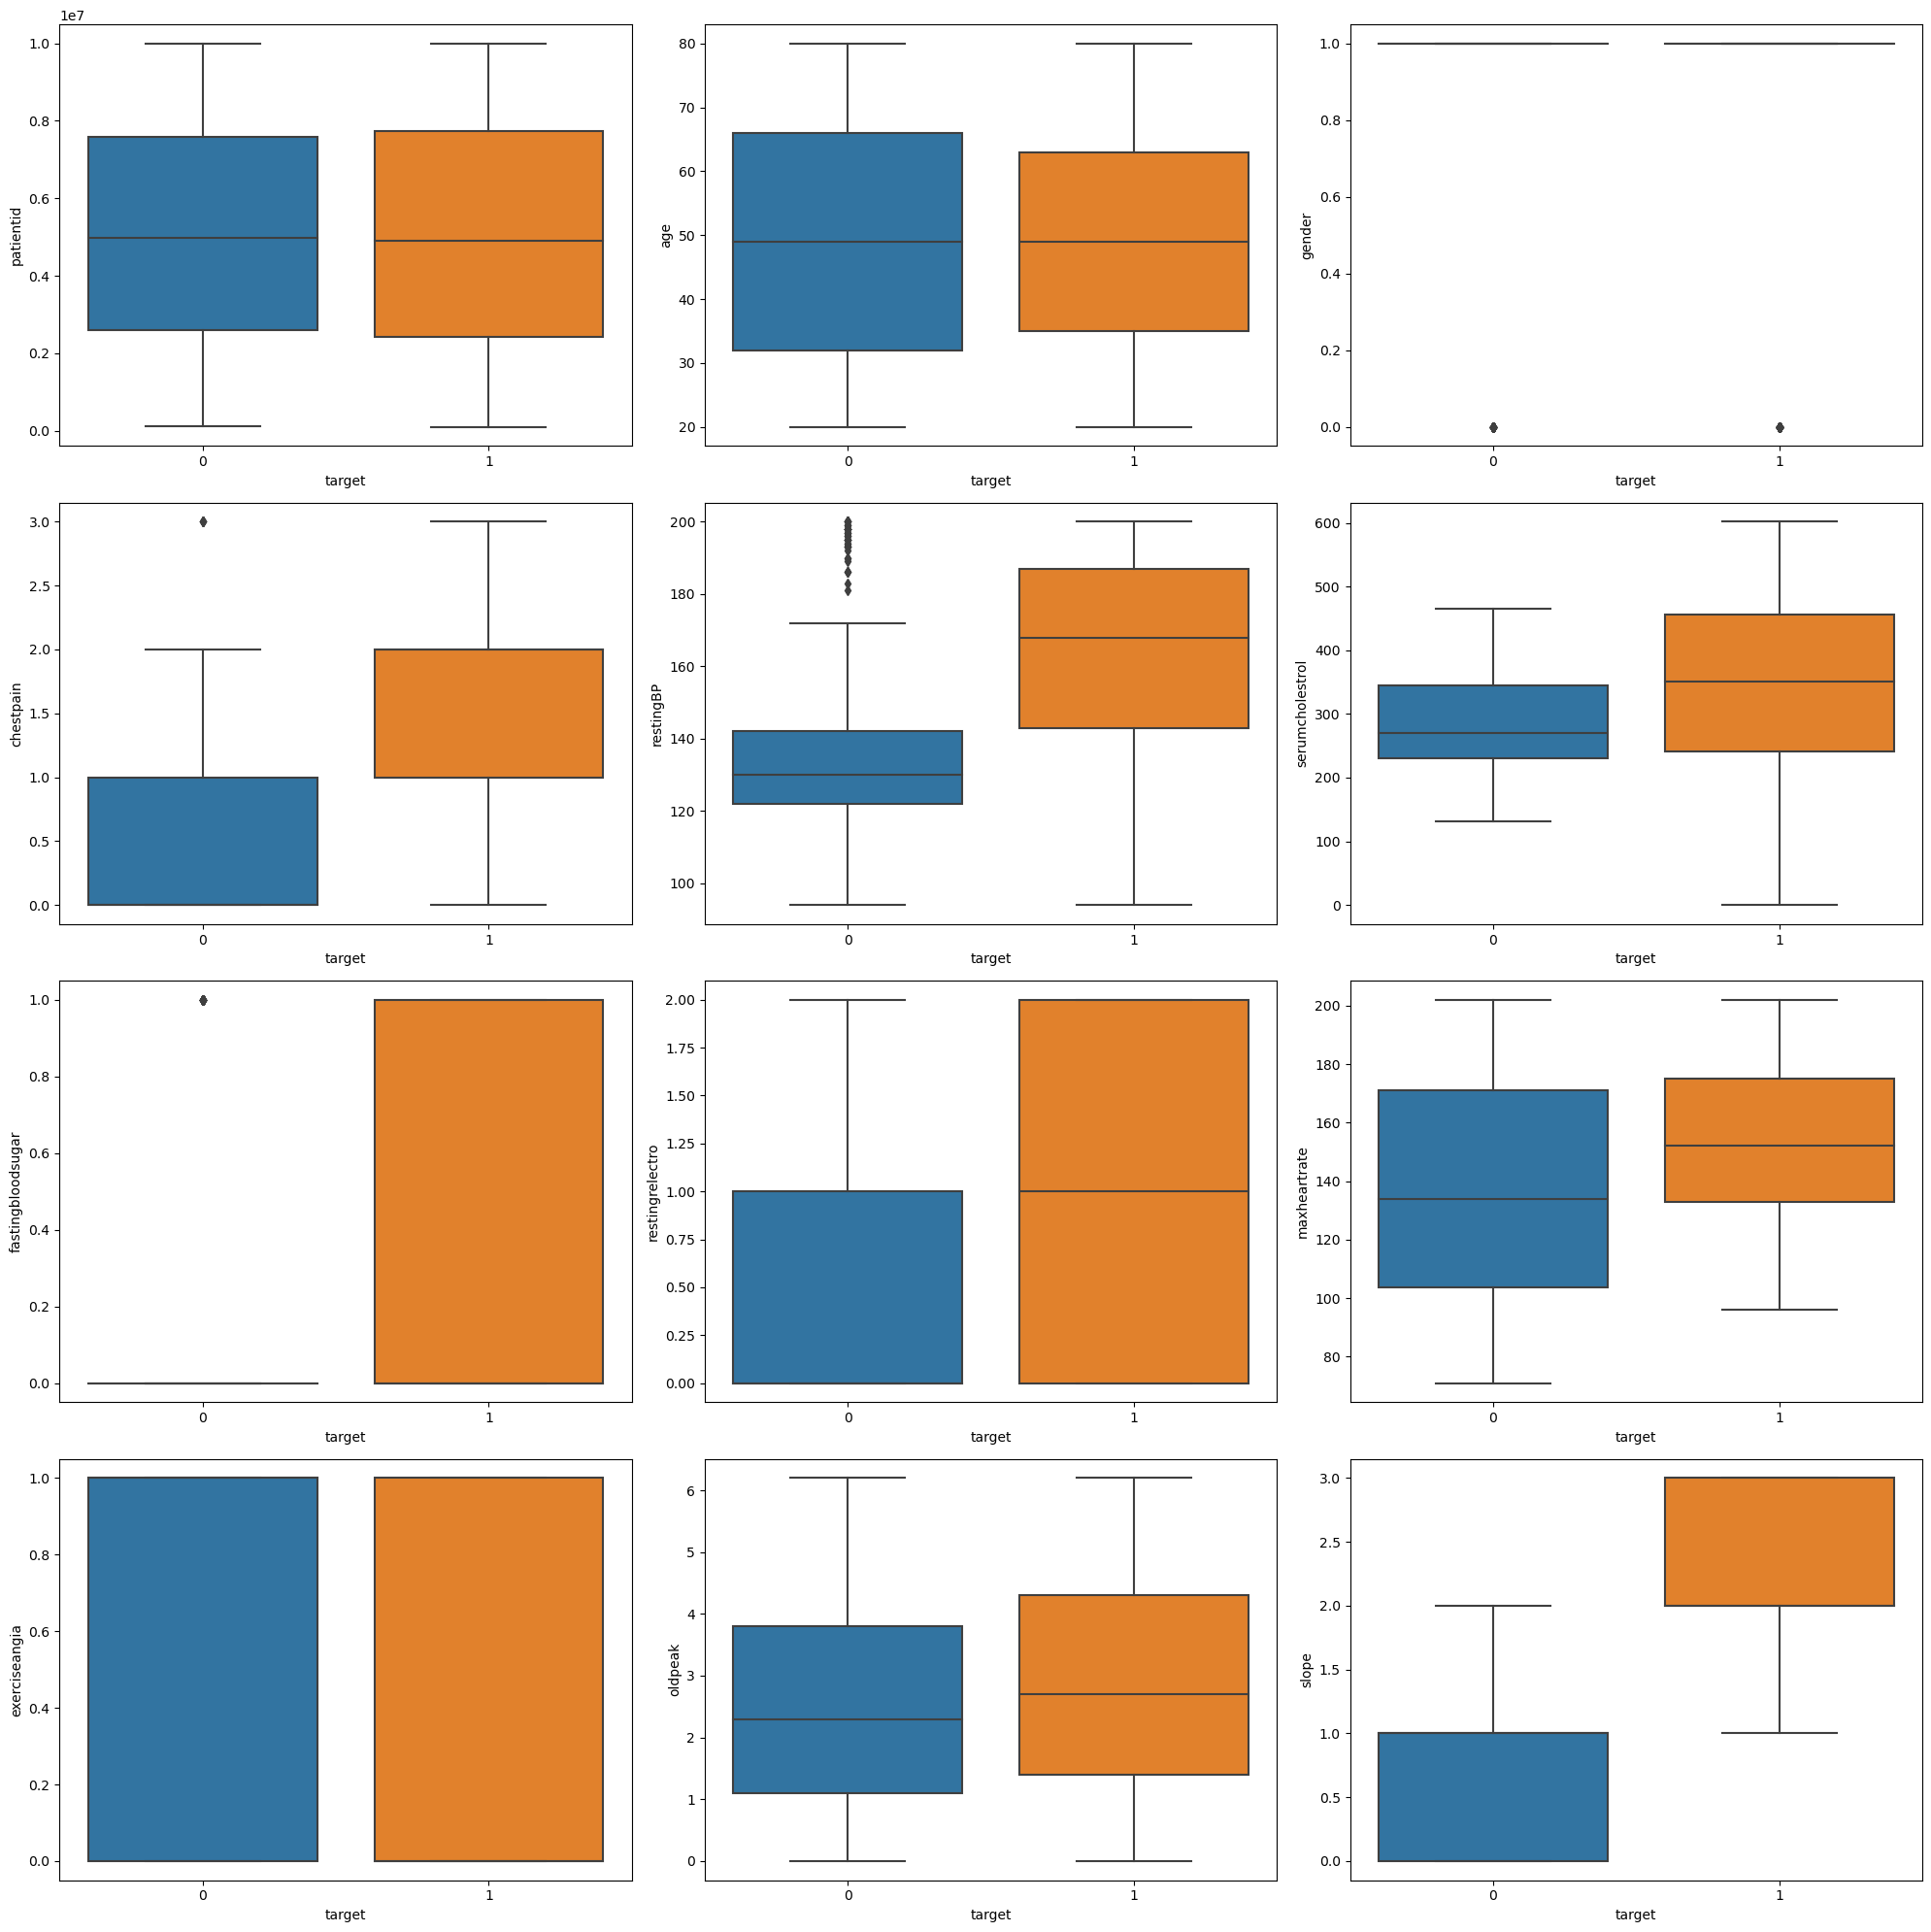

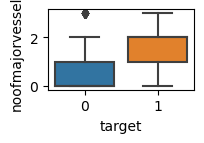

In [20]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "target":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='target', y=feature,data=df)
    # Reset index when it reaches the maximum number of subplots
    if index == 12:
            index = 0
            plt.tight_layout()  # Adjust subplots to prevent overlap
            plt.show()

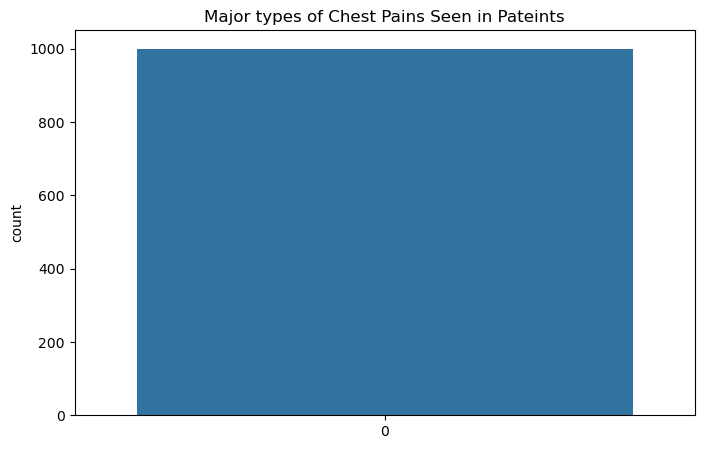

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(df['chestpain'])
plt.title('Major types of Chest Pains Seen in Pateints')
plt.show()

Text(0.5, 1.0, 'The number of heart patients to healthy people')

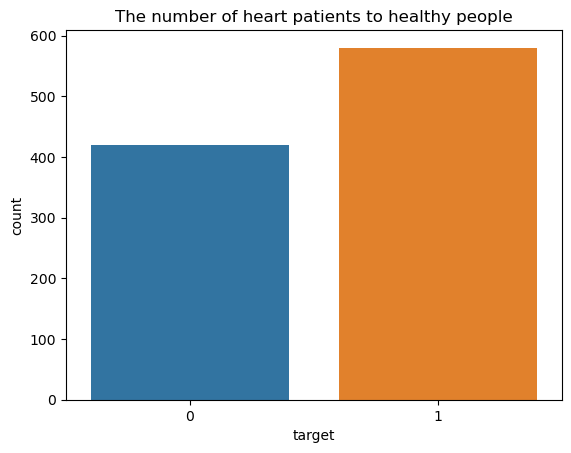

In [22]:
sns.countplot(data=df,x='target')
plt.title('The number of heart patients to healthy people')

In [24]:
categorical_feature = df.dtypes==object
final_categorical_feature = df.columns[categorical_feature].tolist()
# ---------------------------------------------------------
final_numeric_feature = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

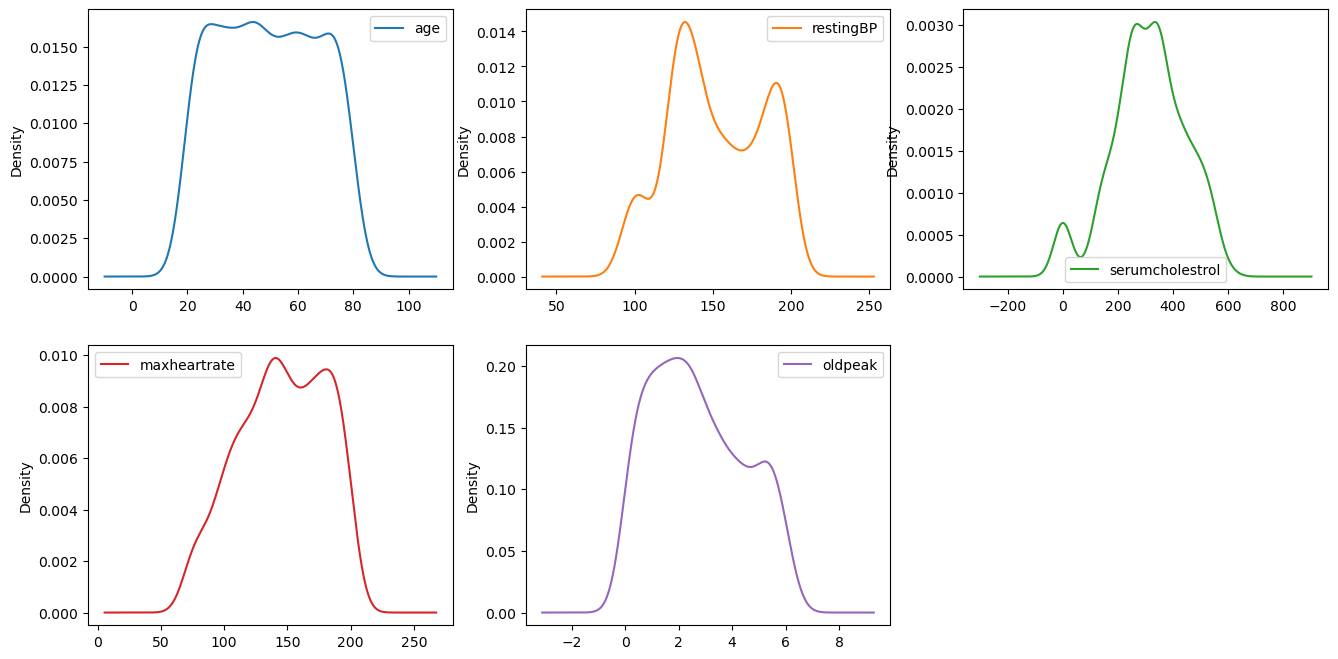

In [25]:
df[final_numeric_feature].plot(kind='density', subplots=True, layout=(2,3), sharex=False, figsize= (16,8))
plt.show()